<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/K%20Nearest%20Neighbor%20(KNN)%20Complete%20Python%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN - K Nearest Neighbors - Classification**


To understand KNN for classification, we'll work with a simple dataset representing gene expression levels. Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.

**A gene that is not normally expressed in that cell can be switched on and expressed at high levels.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

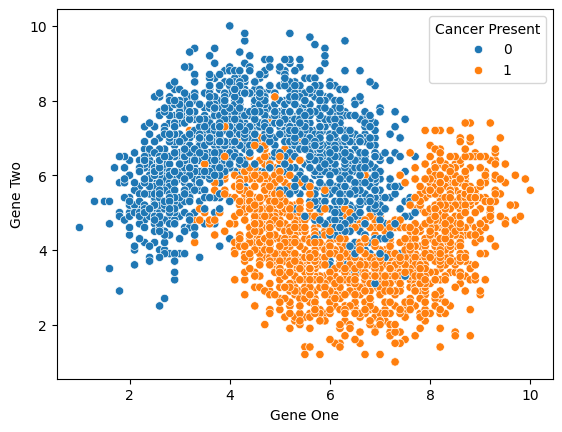

In [ ]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df)

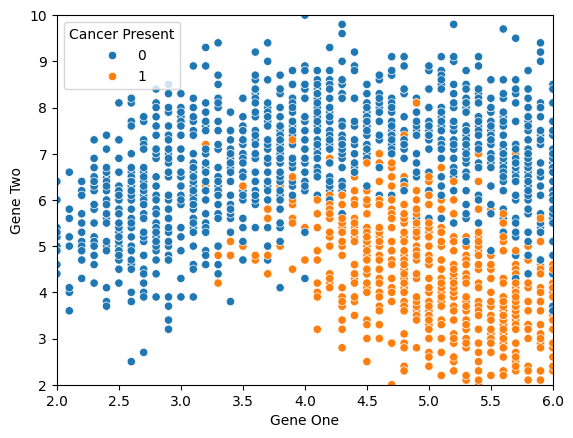

In [ ]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df)
plt.xlim(2,6)
plt.ylim(2,10)
plt.show()

**Train  | Test Split and Scalling Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
x=df.drop('Cancer Present', axis=1)
y=df['Cancer Present']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

**Understanding KNN and Choosing K Value**

In [ ]:
full_test=pd.concat([X_test, y_test], axis=1)

In [ ]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

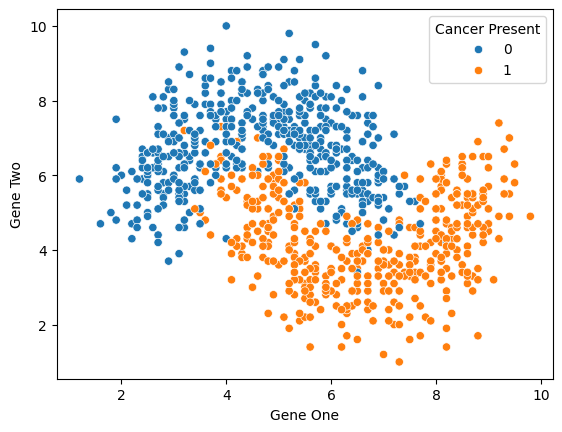

In [ ]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=full_test)


**Model Evaluation**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

y_pred=knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy_score(y_test, y_pred)

0.8911111111111111

In [ ]:
confusion_matrix(y_test, y_pred)

array([[422,  48],
       [ 50, 380]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



**Elbow Method for Choosing Reasonable K Values**

In [ ]:
test_error_rate=[]
for i in range(1,30):
  knn_model=KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(scaled_X_train, y_train)
  pred_y=knn_model.predict(scaled_X_test)
  error_rate=np.mean(pred_y!=y_test)

  test_error=1-accuracy_score(y_test, pred_y)
  test_error_rate.append(test_error)

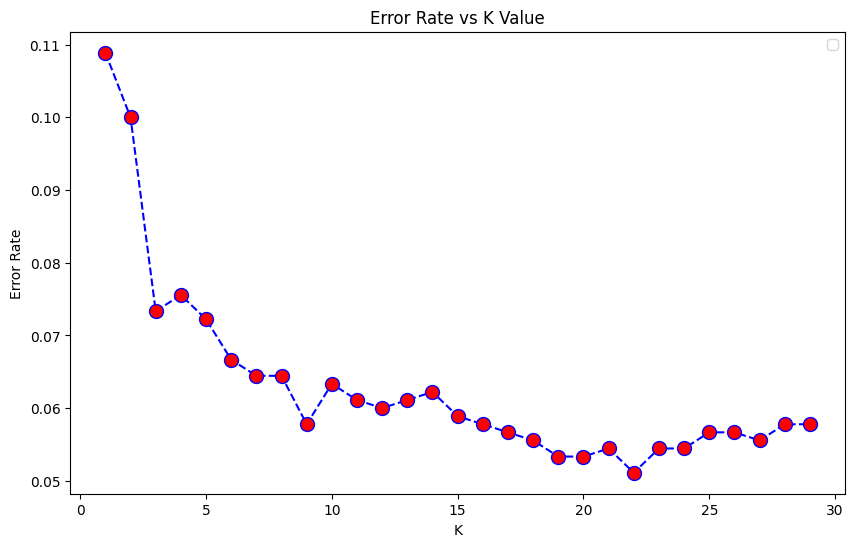

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), test_error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

**Full Cross Validation Grid Search for K Value**



1.   Scale Data
2.   Create Model on Scaled Data

Steps:


1.   The data are split into Training Data and Test Data
2.   the scaler is fitted on the trainging data
3.   The scaler transoform Training DATa
4.   The models are fitted/trained using the transformed Trainning Data
5.   The scaler is used to transform the Test data
6.   The trained models predict using the transformed Test data







In [ ]:
scaler=StandardScaler()


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
operations=[('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
pipe=Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

Chosen_String_name+two UnderScore+Parameter Key Name

model_name+__+Parameter name

knn_model+__n_neighbors

knn_model__n_neighbors

In [ ]:
k_values=list(range(1,20))

In [ ]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
param_grid={'Knn_n_neighbors':k_values}

In [ ]:
full_cv_classifier=GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

**Final Model**

In [ ]:
scaler=StandardScaler()
knn=KNeighborsClassifier(n_neighbors=14)
operations=[('scaler',scaler),('knn14',knn)]
pipe=Pipeline(operations)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [ ]:
pipe_pred=pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [ ]:
single_sample=X_test.iloc[40]

In [ ]:
single_sample

,194
Gene One,3.8
Gene Two,6.3


In [ ]:
pipe.predict(single_sample.values.reshape(1,-1))

array([0])

In [ ]:
pipe.predict_proba(single_sample.values.reshape(1,-1))

array([[0.92857143, 0.07142857]])